# **Milestone 1 - Phase 2**

# **1. Perkenalan**

Nama: `Evita Ardhiya Ramadhani`, Batch: `11`

Dataset: Telco Customer Churn

Problem: Membuat model Artifical Neural Network untuk memprediksi customer churn atau tidak

# **2. Import Libraries**

Import libraries yang akan digunakan dalam pengerjaan assigment seperti pandas, matlotlib, tensorflow dan sebagainya

In [1]:
# Import Libraries load data, linear algebra, statistik
import pandas as pd 
import numpy as np 
import scipy.stats as stats

# library untuk plot
import matplotlib.pyplot as plt
import seaborn as sns

# Split data train-set dan test-set
from sklearn.model_selection import train_test_split 

# handling outliers
from feature_engine.outliers import Winsorizer

# Feature Scaling dan encoding
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# metrics
from sklearn.metrics import classification_report

# model data 
import tensorflow as tf
from tensorflow import keras

# handling imbalance data
from imblearn.over_sampling import SMOTENC

# load model
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**

Load dataset yang akan digunakan dalam assigment

In [2]:
# load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Lakukan duplicate dataset sebelum dieskplorasi lebih lanjut, hal ini bertujuan untuk menyimpan cadangan jika sewaktu-waktu dataset dibutuhkan

In [3]:
# duplicate dataset
data_copy = data.copy()

Tampilkan Head dan Tail dari dataset

In [4]:
# 5 baris teratas dataset
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 5 baris terakhir dataset
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Cek tipe data dan menlihat jumlah non-null dari masing-masing kolom menggunakan .info()

In [6]:
# info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Sebagian besar tipe data lebih banyak berupa data kategori dibandingkan dengan data numerik
- Tidak terdapat missing value karena jumlah non-null tiap kolom sama dengan jumlah baris dataset
- Pada tampilan kolom diatas diketahui bahwa kolom TotalCharges merupakan data numerik, tetapi pada data info TotalCharges adalah data string. oleh karena itu dilakukan pengubahan tipe data dari string ke numerik

Mengubah tipe data dari string ke numerik, referensi code https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

In [7]:
# ubah data dari string ke numerik
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

Untuk mengecek nilai statistik seperti mean, median, modus dsb dapat menggunakan .describe(), tetapi hanya bisa untuk data numerik

In [8]:
# describe dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Maksimal kontrak (Tenure) customer adalah 6 tahun dan rata-rata 1 tahun
- Untuk montly charges rata-rata sebesar 64.76 dan maximal 118.75

In [9]:
# konvensi value dari target
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# **4. Exploratory Data Analysis (EDA)**

## Korelasi antara fitur dan target

Sebelum dilakukan pengecekan korelasi, data yang berupa kategori harus dilakukan encoding terlebih dahulu

In [10]:
# definisikan encoder
encoder1 = OrdinalEncoder()

# fit dan transform data untuk melakukan encoding
data_encoder = encoder1.fit_transform(data)

# membuat data encoder dalam bentuk dataframe
data_encoder_df = pd.DataFrame(data_encoder, columns= data.columns)
data_encoder_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,142.0,74.0,0.0
1,3962.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,498.0,3624.0,0.0
2,2564.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,436.0,536.0,1.0
3,5535.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,266.0,3570.0,0.0
4,6511.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,729.0,674.0,1.0


Membuat heatmap berdasarkan dataframe yang telah dilakukan encoding

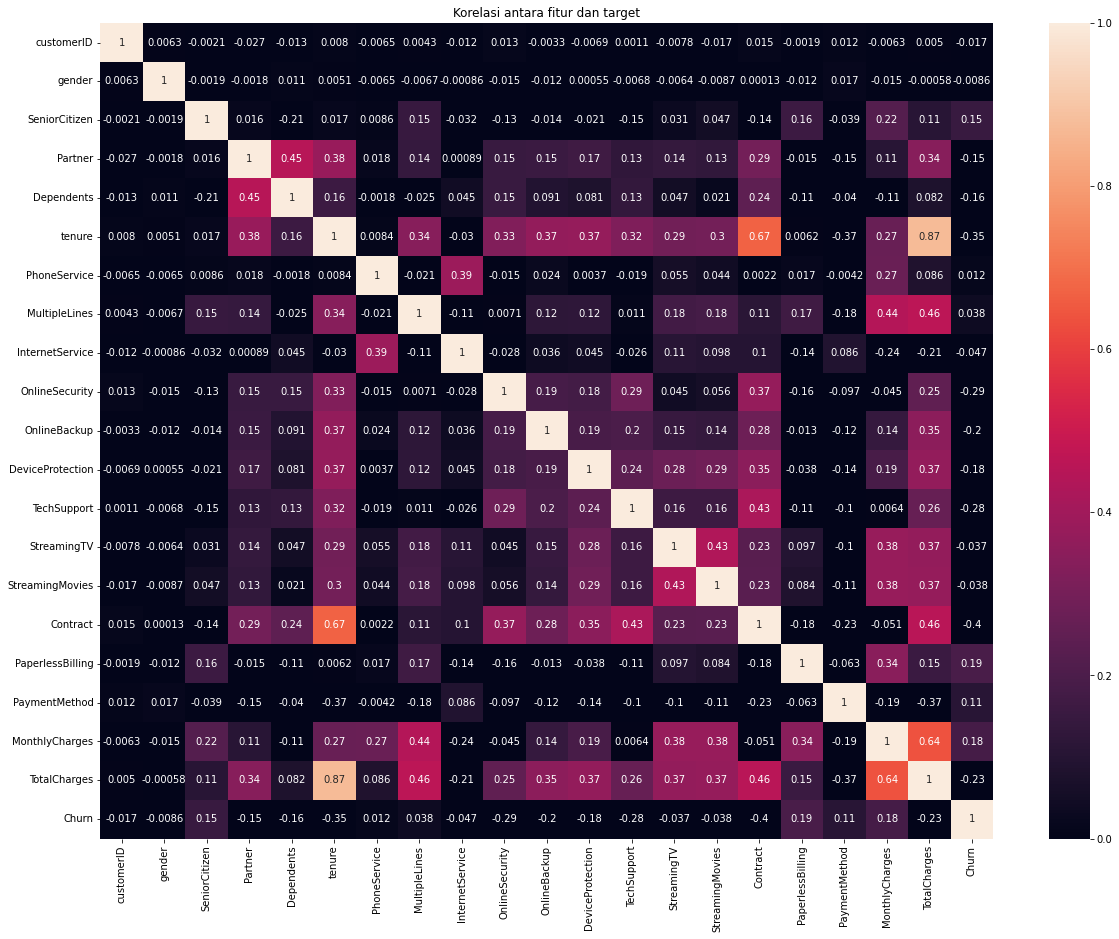

In [11]:
# cek korelasi 
korelasi = data_encoder_df.corr()

# buat heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(korelasi, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()

- Ada 4 fitur yang memiliki korelasi tertinggi terhadap target yaitu PaperlessBilling, MonthlyCharges, SeniorCitizen dan PaymentMethod
- Sbenarnya korelasi paling tinggi oleh fitur tenure tetapi dalam artinya berbanding terbalik karena nilai korelasi antara tunure dan target bertanda minus.
- Fitur Contract dan tenure memiliki korelasi yang tinggi, sehingga harus dipilih salah satu fitur yang digunakan dalam prediksi
- Korelasi tenure dan TotalCharges tinggi, karena semakin lama atau semakin tinggi customer menggunakan layanan maka tagihan yang akan dibayar akan semakin tinggi juga

## Perbandingan jumlah gender

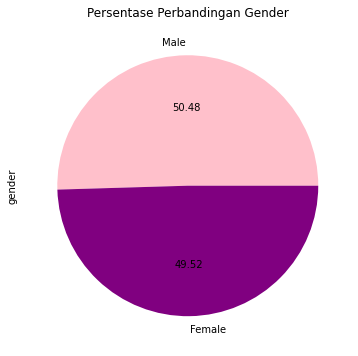

In [12]:
# jumlah tiap kaegori male dan female dan membuat pie chart
data['gender'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f', colors=['pink', 'purple'])
plt.title('Persentase Perbandingan Gender')
plt.show()

- Jumlah customer male dan female hampir seimbang

## Partner dan Dependents

In [13]:
# jumlah perbandingan Partner dan Dependents
print(data.groupby('Partner')['Dependents'].value_counts())

Partner  Dependents
No       No            3280
         Yes            361
Yes      Yes           1749
         No            1653
Name: Dependents, dtype: int64


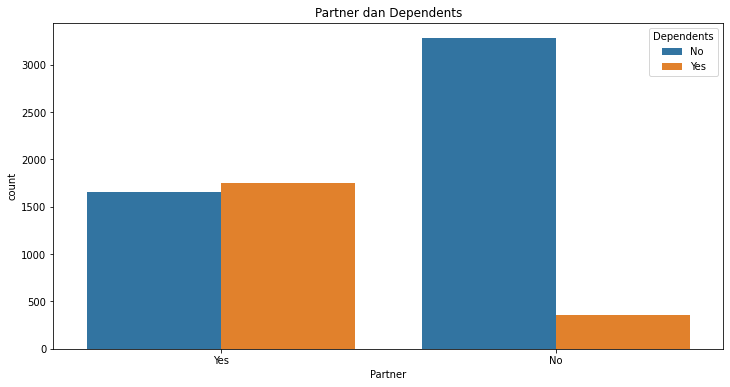

In [14]:
# plot perbandingan Partner dan Dependents
plt.figure(figsize=(12,6))
sns.countplot(data=data, x=data['Partner'], hue=data['Dependents'])
plt.title('Partner dan Dependents')
plt.show()

- Customer yang tidak memiliki patner cenderung tidak memiliki tanggungan
- Tetapi masih banyak juga customer yang memiliki patner tapi tidak memiliki tanggungan, mungkin karena untuk pembayaran mereka dilakukan secara terpisah sehingga tidak terbaca oleh sistem memiliki tanggungan
- Ada juga customer yang tidak memiliki patner tetapi memiliki tanggungan, kemungkinan tanggungan yang dimaksud bisa jadi anggota keluarga lainnya. Misalnya seorang kakak menanggung biaya untuk adiknya.

## Customer Age

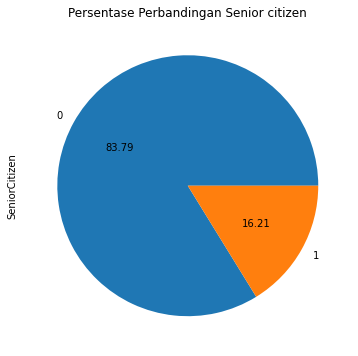

In [15]:
# pie chart persentase senior citizen customer
data['SeniorCitizen'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Persentase Perbandingan Senior citizen')
plt.show()

- lebih dari 80% customer didominasi oleh anak muda
- hanya ada 16.21% yang orang tua

## Cek Label pada target

Untuk melihat apakah jumlah label target telah balance atau tidak

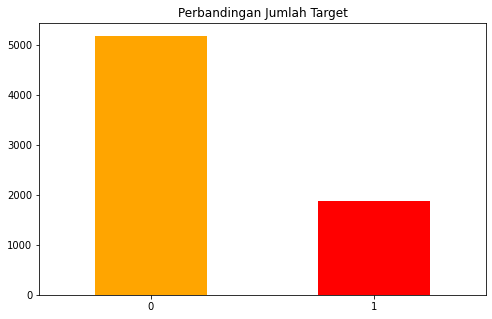

In [16]:
# hitung jumlah tiap kategori dan buat barplot
data['Churn'].value_counts().plot(kind='bar', color=['orange', 'red'], figsize=(8,5))
plt.title('Perbandingan Jumlah Target')
plt.xticks(rotation=0)
plt.show()

- jumlah label pada target memiliki jumlah yang tidak setara, atau terdeteksi imbalanced data.
- Data label 'Yes' atau 1 hanya ada 26.53% dari jumlah keseluruhan data
- Perlu dilakukan handling imbalance data

noted: refernsi EDA https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

## Apakah Rata-rata Total Charges dari senior citizen memiliki perbedaan yang signifikan?

Penulis ingin melihat apakah rata-rata Total Charges dari senior citizen dan bukan senior citizen memiliki perbedaan yang signifikan. Pengujian hipotesis dilakukan menggunakan Two Samples Independent Two Tailed test. Dimana Hipotesis yang akan diuji sebagai berikut:
- Hipotesis 0 (H0) : Rata-rata total charges dari senior citizen **tidak memiliki perbedaan yang signifikan** dengan rata-rata total charges dari bukan senior citizen. 
    - μ_senior = μ_no_senior
- Hipotesis 1 (H1) : Rata-rata total charges dari senior citizen **memiliki perbedaan yang signifikan** dengan rata-rata total charges dari bukan senior citizen.
    - μ_senior != μ_no_senior

Mari cek rata-rata total charges dari senior citizen dan bukan senior citizen

In [17]:
# Sort berdasarkan Yes Senior citizen 
yes_senior = data[(data['SeniorCitizen'] == 1)][['customerID','TotalCharges']].groupby('customerID').sum()

# Menampilkan hasil rata-rata
mean_yes_senior = np.round(yes_senior['TotalCharges'].mean())
print('Rata-rata Total Charges Senior Citizen:', mean_yes_senior)

Rata-rata Total Charges Senior Citizen: 2810.0


In [18]:
# Sort berdasarkan No Senior Citizen
no_senior = data[(data['SeniorCitizen'] == 0 )][['customerID', 'TotalCharges']].groupby('customerID').sum()

# Menampilkan hasil rata-rata 
mean_no_senior = np.round(no_senior['TotalCharges'].mean())
print('Rata-rata Total Charges No Senior Citizen:', mean_no_senior)

Rata-rata Total Charges No Senior Citizen: 2177.0


Lakukan pengujian hipotesis menggunakan t-test independent karena sampel merupakan sampel yang independent (tidak berhubungan).

In [19]:
# menguji hipotesis menggunakan t-test ind
t_stat, p_val = stats.ttest_ind(yes_senior, no_senior)

# melihat nilai p-value
print('P-value:',p_val[0])

# melihat nilai t-statistics
print('t-statistics:',t_stat[0])

P-value: 4.4729254683419705e-18
t-statistics: 8.689539721750764


- nilai p-value yang diperoleh adalah 4.47, dimana nilai ini lebih besar dari nilai alfa
- Nilai alfa = 0.05 karena menggunakan confident interval 95%
- Dari nilai p-value, hipotesis H0 ditolak karena nilai p-value lebih besar dibandingkan nilai alfa
- Untuk lebih jelasnya, akan dilakukan visualisasi dari distribusi Senior citizen dan bukan senior citizen dan melihat letak garis hipotesis alternatif  

Visualisasi dari distribusi senior citizen dan bukan senior citizen

In [20]:
# Distribusi Senior Citizen
dis_yes_senior = np.random.normal(yes_senior.TotalCharges.mean() , yes_senior.TotalCharges.std(),10000)
# Distribusi No Senior citizen
dis_no_senior = np.random.normal(no_senior.TotalCharges.mean(), no_senior.TotalCharges.std(),10000)

# convident interval 95%
ci = stats.norm.interval(0.95, yes_senior.TotalCharges.mean() , yes_senior.TotalCharges.std())

# batasan dari alternatif hipotesis
alt_hipo1 = dis_yes_senior.mean() + t_stat[0]*dis_yes_senior.std()
alt_hipo2 = dis_yes_senior.mean() - t_stat[0]*dis_yes_senior.std()

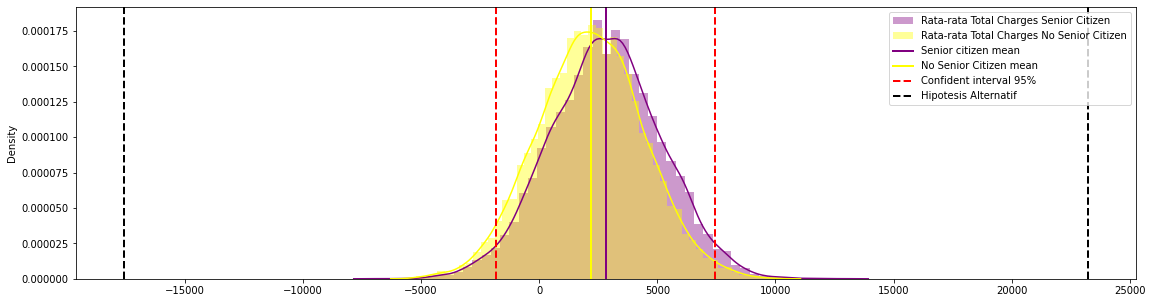

In [21]:
# plot distribusi normal
plt.figure(figsize=(19,5))
sns.distplot(dis_yes_senior, label='Rata-rata Total Charges Senior Citizen',color='purple')
sns.distplot(dis_no_senior, label='Rata-rata Total Charges No Senior Citizen',color='yellow')

# garis mean dari senior citizen dan bukan senior citizen
plt.axvline(mean_yes_senior, color='purple', linewidth=2, label='Senior citizen mean')
plt.axvline(mean_no_senior, color='yellow',  linewidth=2, label='No Senior Citizen mean')

# garis confident interval 95%
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2, label='Confident interval 95%')
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)

# garis hipotesis alternatif
plt.axvline(alt_hipo1, color='black', linestyle='dashed', linewidth=2, label = 'Hipotesis Alternatif')
plt.axvline(alt_hipo2, color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

- Dapat dilihat pada plot diatas bahwa garis hipotesis alternatif (hitam) berada diluar dari garis confident interval 95% sehingga dapat dikatakan bahwa kita menolak H0
- Jadi rata-rata total charges dari senior citizen dan bukan senior citizen memiliki perbedaan yang signifikan
- Sebelumnya kita telah melihat bahwa jumlah dari yang senior citizen lebih sedikit, tetapi dari rata-rata total chargesnya diketahui bahwa senior citizen ini memiliki nilai yang lebih besar dibandingkan dari bukan senior citizen. Oleh karena itu dapat dikatakan bahwa kebayakan dari customer citizen lebih loyal dibandingkan dengan yang bukan senior citizen. Nah ini bisa menjadi salah satu indikasi untuk mempertimbangkan customer churn atau tidak.
- Referensi untuk hipotesis testing dari materi kelas P0W3D3PM: https://colab.research.google.com/drive/1U8PY-YKh-fnoY2YOiu8hfwzrZUmZj495?usp=sharing

# **5. Data Preprocessing**

## Split data inferece

Mengambil data random untuk dijadikan data inference atau data yang dianggap baru. Data ini nantinya akan digunakan pada model yang telah diimporeve atau data ini digunakan untuk model inference

In [22]:
# split 20 data inference dengan random state 23
data_inf = data.sample(100, random_state=23)
data_inf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4117,6211-WWLTF,Male,0,Yes,No,63,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),99.70,6330.4,0
1302,3230-IUALN,Female,0,Yes,Yes,45,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,81.00,3533.6,0
6201,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.70,374.8,0
3784,4958-XCBDQ,Male,1,No,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,3496.3,1
2739,4455-BFSPD,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),101.15,6383.9,0


Setelah mengambil data untuk data inference, hapus data tersebut dari dataset awal yang akan digunakan untuk data train test. Hal ini agar tidak terjadinya data leak saat memprediksi data inference.

In [23]:
# Drop data inference dari dataset
data_train_test = data.drop(data_inf.index)
data_train_test.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Karena pengambilan data inference dilakukan secara random yang mengakibatkan index dari data inferece dan data train test tidak berururan, oleh karena itu dilakukan reset index.

In [24]:
# Reset index data train test
data_train_test.reset_index(drop=True, inplace=True)

# Reset index data inference
data_inf.reset_index(drop=True, inplace=True)

## Split Data train-test

Definisikan fitur dan target

In [25]:
# data fitur (X)
X = data_train_test.drop('Churn', axis=1)

# data target (y)
y = data_train_test['Churn']

Split data untuk training model (data train) dan untuk evaluasi model (data test). Penulis menggunakan perbandingan 80% untuk data train dan 20% untuk test

In [26]:
# split data train dan test dengan test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

Pada deep learning ini akan dilakukan validation yang menggunakan data validasi. data tersebut dapat diambil dari data train

In [27]:
# split data train dan data val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=23)

In [28]:
# tampilkan size dataset, train dan test
print('Size dataset:', data_train_test.shape)
print('Size X-Train:', X_train.shape)
print('Size y-Train:', y_train.shape)
print('Size X-val:', X_val.shape)
print('Size y-val:', y_val.shape)
print('Size X-Test:', X_test.shape)
print('Size y-Test:', y_test.shape)

Size dataset: (6943, 21)
Size X-Train: (4443, 20)
Size y-Train: (4443,)
Size X-val: (1111, 20)
Size y-val: (1111,)
Size X-Test: (1389, 20)
Size y-Test: (1389,)


## Data Cleaning

### Pertama, cek missing value pada fitur dan target

In [29]:
# missing value dari masing-masing data
print('Missing value X-train:', X_train.isnull().sum().sum())
print('Missing value y-train:', y_train.isnull().sum().sum())

print('Missing value X-train:', X_val.isnull().sum().sum())
print('Missing value y-train:', y_val.isnull().sum().sum())

print('Missing value X-test:', X_test.isnull().sum().sum())
print('Missing value y-test:', y_test.isnull().sum().sum())

Missing value X-train: 6
Missing value y-train: 0
Missing value X-train: 1
Missing value y-train: 0
Missing value X-test: 4
Missing value y-test: 0


- Pada data info sebelumnya dilakukan pengecekan bahwa jumlah non-null sama semua, tetapi setelah dilakukan perubahan jenis tipe data dari fitur TotalCharges, terdeteksi adanya missing value.
- Gunakan imputation untuk replace missing value, sebelum itu lihat distribusi pada kolom TotalCharges

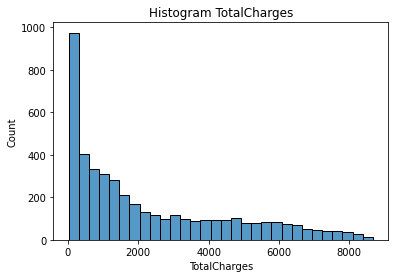

In [30]:
# jenis distribusi kolom
sns.histplot(X_train['TotalCharges'], bins=30)
plt.title('Histogram TotalCharges')
plt.show()

- karena distribusi dari kolom TotalCharges adalah right-skew, maka akan digunakan median imputation
- Sebenarnya missing value dari X-train, X-val dan X-test sangat sedikit bahkan tidak mencapai 1% dari data, tetapi dilkaukan imputation karena jika dilakukan drop baris maka jumlah baris pada fitur dan target akan berbeda dan hal tersebut akan menyebabkan error pada proses training maupun prediksi model

In [31]:
# replace missing value TotalCharges
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)

In [32]:
# cek kembali missing value
print('Missing value X-train:', X_train.isnull().sum().sum())

print('Missing value X-train:', X_val.isnull().sum().sum())

print('Missing value X-test:', X_test.isnull().sum().sum())

Missing value X-train: 0
Missing value X-train: 0
Missing value X-test: 0


### Kedua, cek outliers

jika ditemukan outliers maka yang hanya akan dilakukan handling pada data train, oleh karena itu hanya dilakukan pengecekan pada X-train

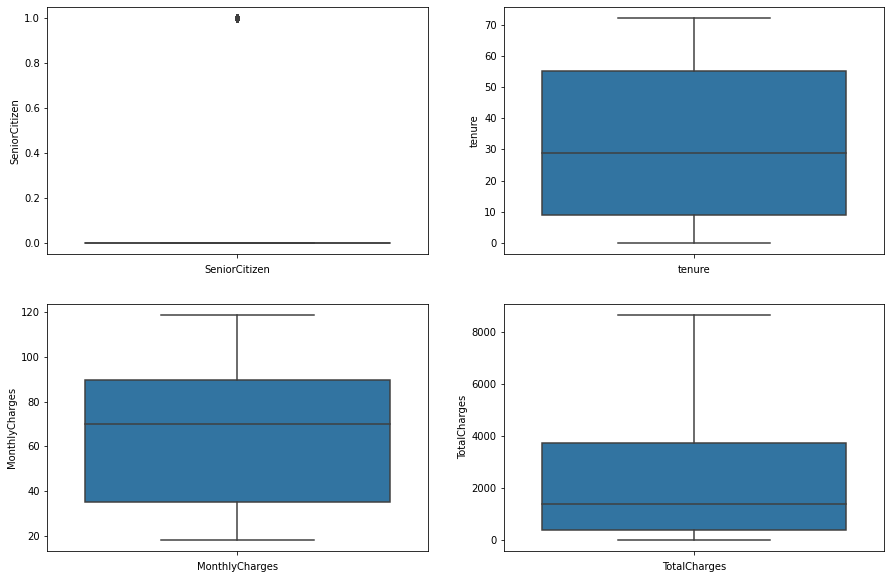

In [33]:
# definisikan kolom numerik
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# definisikan besar figsize
plt.figure(figsize=(15,10))

# buat looping untuk boxplot kolom
for i, col in enumerate(cols):
    if X_train[col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.boxplot(y=X_train[col])
        plt.xlabel(col)
        
plt.show()

- Dari boxplot diatas sudah tidak terdapat outliers sehingga tidak diperlukan handling outliers
- Untuk fitur Senior citizen bukan merupakan outliers, tetapi data tersebut merupakan fitur yang termasuk kategori tetapi dalam bentuk numerik
- Ref: https://www.kaggle.com/code/asimislam/tutorial-python-subplots/notebook

## Feature Selection

Feature selection bertujuan untuk memilih fitur apa saja yang akan digunakan untuk membantu model dalam prediksi

In [34]:
# display X-train
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
600,8672-OAUPW,Male,0,No,Yes,51,Yes,No,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic),47.85,2356.75
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6445,5712-PTIWW,Male,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,79.85,152.45
4981,6925-BAYGL,Female,1,Yes,No,53,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,1275.60
6498,5832-XKAES,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.80,134.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2446-ZKVAF,Male,0,Yes,No,18,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),56.80,1074.65
2602,6877-TJMBR,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,84.80,84.80
420,7663-ZTEGJ,Male,0,No,Yes,29,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),100.55,2830.45
569,4710-FDUIZ,Male,0,Yes,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),100.30,5614.45


- Fitur customerID dapat didrop karena setiap rows atau setiap customer memiliki ID yang unik (berbeda satu sama lain). Tidak ada customer ID tertentu yang akan mempenagruhi churn atau tidaknya, ID biasanya hanya digunakan untuk identifikasi customer.

In [35]:
# Drop column yang tidak digunakan 
# X-train
X_train.drop(['customerID'],axis=1, inplace=True)

# X-val
X_val.drop(['customerID'],axis=1, inplace=True)

# X-test
X_test.drop(['customerID'],axis=1, inplace=True)

## Split Data Numerik dan data kategorik

Memisahkan data numerik dan kategorik bertujuan untuk dilakukan proses scaling yang berbeda untuk masing-masing tipe data. Scaling pada numerik dan encoding dan SMOTENC pada kategori 

In [36]:
# split kolom untuk numerik
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
# split kolom untuk kategori
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

# kolom yang termasuk numerik
print('Kolom Numerik : ', num_col)
# kolom yang bertipe kategori
print('Kolom Kategori : ', cat_col)

Kolom Numerik :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Kolom Kategori :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Gabungkan data numerik dan kategori untuk masing-masing X-train, X-val dan X-test

In [37]:
# untuk X-train numerik dan kategorik
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

# untuk X-validation numerik dan kategorik
X_val_num = X_val[num_col]
X_val_cat = X_val[cat_col]

# untuk X-test numerik dan kategorik
X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

## Handling imbalace data with scaling and encoding

Karena handling imbalance data hanya dilakukan pada X-train, maka untuk X-val dan X-test hanya dilakukan scaling dan tidak dilakukan SMOTENC

In [38]:
# definisikan scaler
scaler = StandardScaler()

In [39]:
# x-train num scaling
scaler.fit(X_train_num)
X_train_imbalanced_num = scaler.transform(X_train_num)
# X-val num scaling
X_val_scaled = scaler.transform(X_val_num)
# X-test num scaling
X_test_scaled = scaler.transform(X_test_num)

Gabungkan X-train num yang sudah discaling dengan X-train cat yang belum dilakukan encoding

In [40]:
# gabungkan data num scaling dan data cat belum diencoding
X_train_imbalanced_new = np.concatenate([X_train_imbalanced_num, X_train_cat], axis=1)

# Display X-train final dalam data frame
X_train_imbalanced_new_df = pd.DataFrame(X_train_imbalanced_new, columns=[num_col + cat_col])
X_train_imbalanced_new_df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.430618,0.773369,-0.555249,0.045434,Male,No,Yes,Yes,No,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic)
1,-0.430618,-0.986938,1.172583,-0.63814,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,-0.430618,-1.232563,0.512138,-0.935398,Male,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check
3,2.322242,0.855244,-1.314094,-0.435638,Female,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
4,-0.430618,-1.232563,0.176912,-0.943296,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


Lakukan handling imbalace data

In [41]:
# definisikan smotenc dan kolom categori
smotenc = SMOTENC([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], random_state = 23)
# lakukan smote pada data train
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train)
#tampilakan target
y_train_balanced.value_counts()

0    3260
1    3260
Name: Churn, dtype: int64

Setelah berhasil dilakukan handling imbalace, pisahkan kembali kolom numerik dan kategori untuk dilakukan endcoding pada kategori

In [42]:
# ubah kedalam dataframe terlebih dahulu
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=[num_col + cat_col])

# untuk X-train-balance numerik dan kategorik
X_train_balance_num = X_train_balanced_df[num_col]
X_train_balance_cat = X_train_balanced_df[cat_col]

Lakukan encoding pada data kategori

In [43]:
# definisikan encoder
encoder = OrdinalEncoder()

In [44]:
# x-train cat encoding
encoder.fit(X_train_balance_cat)
X_train_balance_encoded = encoder.transform(X_train_balance_cat)
# X-val num scaling
X_val_encoded = encoder.transform(X_val_cat)
# X-test num scaling
X_test_encoded = encoder.transform(X_test_cat)

Setelah dilakukan scaling dan encoding, maka data numerik dan kategorik akan digabungkan kembali dan dijadikan data frame

In [45]:
# untuk X-train final
X_train_final = np.concatenate([X_train_balance_num, X_train_balance_encoded], axis=1)
# untuk X-val final
X_val_final = np.concatenate([X_val_scaled, X_val_encoded], axis=1)
# untuk X-test final
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

In [46]:
# X-train, X-val dan X-test final dalam data frame
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_col + cat_col])
X_val_final_df = pd.DataFrame(X_val_final, columns=[num_col + cat_col])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_col + cat_col])

X_train_final_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.430618,0.773369,-0.555249,0.045434,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
1,-0.430618,-0.986938,1.172583,-0.63814,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
2,-0.430618,-1.232563,0.512138,-0.935398,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0
3,2.322242,0.855244,-1.314094,-0.435638,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
4,-0.430618,-1.232563,0.176912,-0.943296,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,-0.430618,-1.253352,0.238768,-0.954969,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6516,-0.430618,-0.393241,0.683061,-0.160654,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
6517,-0.430618,-1.265502,-1.346104,-0.99012,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0
6518,-0.430618,-0.793094,1.074635,-0.447174,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0


- Referensi untuk handling imbalace data dari materi Advance feature engineering P1W4D1PM : https://colab.research.google.com/drive/1HvaSz-j0_UnIlXN4s6jgQD23iAQofron?usp=sharing#scrollTo=xGmTxutMpw0y

# **6. Pembuatan Model**

## Input Pipeline

Sebelumnya, datanya dalam bentuk numpy array dan saat saya ingin membuat pipeline (diubah ke tensor) terjadi error. Oleh karena itu mengubah tipe data sehingga data X-train, X-val dan X-test dapat di ubah menjadi tensor. ref: https://stackoverflow.com/questions/58636087/tensorflow-valueerror-failed-to-convert-a-numpy-array-to-a-tensor-unsupporte

In [47]:
X_train_final = np.asarray(X_train_final).astype(np.float32)
X_val_final = np.asarray(X_val_final).astype(np.float32)
X_test_final = np.asarray(X_test_final).astype(np.float32)

Input pipeline digunakan untuk membagi data berdasarkan banyak batch yang telah ditentukan

In [48]:
# untuk train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_balanced)).batch(128)
# untuk validation data
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(128)
# untuk test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(128)

## Model Definition, Training dan Evaluation

### **Model Sequential**

Membuat arsitektir model menggunakan Sequential API

In [49]:
#cek shape dari X-train
X_train_final.shape

(6520, 19)

In [50]:
# definisikan model Sequential
model_sequential = tf.keras.models.Sequential()
# layer input
model_sequential.add(tf.keras.layers.Dense(16, input_shape=(19,)))
# hidden layer 1
model_sequential.add(tf.keras.layers.Dense(8))
# hidden layer 2
model_sequential.add(tf.keras.layers.Dense(4))
# output layer
model_sequential.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Lakukan compile model, untuk menerjemahkan bahasa kode menjadi bahasa mesin (ref: kak Afif )

In [51]:
# compile
model_sequential.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [52]:
# summary dari modeel
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


Training model sequential

In [53]:
# training model dengan 50 epoch
history_sequential = model_sequential.fit(train_dataset, 
                                        epochs=50, 
                                        validation_data=(val_dataset),
                                        verbose=1)

Epoch 1/50
51/51 [==============================] - 19s 176ms/step - loss: 0.6769 - accuracy: 0.6929 - val_loss: 0.7114 - val_accuracy: 0.6463
Epoch 2/50
51/51 [==============================] - 1s 16ms/step - loss: 0.6024 - accuracy: 0.7190 - val_loss: 0.6203 - val_accuracy: 0.6859
Epoch 3/50
51/51 [==============================] - 1s 13ms/step - loss: 0.5515 - accuracy: 0.7433 - val_loss: 0.5967 - val_accuracy: 0.6886
Epoch 4/50
51/51 [==============================] - 1s 14ms/step - loss: 0.5338 - accuracy: 0.7511 - val_loss: 0.5789 - val_accuracy: 0.6949
Epoch 5/50
51/51 [==============================] - 1s 10ms/step - loss: 0.5218 - accuracy: 0.7538 - val_loss: 0.5669 - val_accuracy: 0.7003
Epoch 6/50
51/51 [==============================] - 1s 15ms/step - loss: 0.5134 - accuracy: 0.7589 - val_loss: 0.5581 - val_accuracy: 0.7021
Epoch 7/50
51/51 [==============================] - 1s 12ms/step - loss: 0.5072 - accuracy: 0.7630 - val_loss: 0.5516 - val_accuracy: 0.7129
Epoch 8/50


Untuk melihat grafik dari loss dan validasi loss, ubah history data yang telah dilakukan train menjadi dataframe

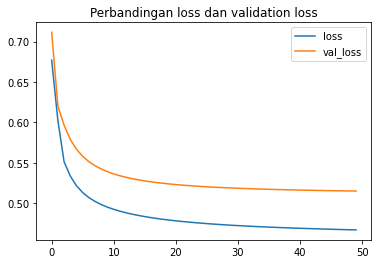

In [54]:
# ubah ke dataframe
metrics_sequensial = pd.DataFrame(history_sequential.history)

# plot loss dan validation loss
metrics_sequensial[['loss', 'val_loss']].plot()
plt.title('Perbandingan loss dan validation loss')
plt.show()

- Pada arsitektur model sequential awal belum digunakan activation function pada input dan hidden layer, oleh krena itu akan dilakukan model improvment agar model lebih stabil dan terhindar dari gradient desent (atau meminimalisir adanya perubahan yang besar pada loss)
- Catatan: karena setiap kali dilakukan re-run saat proses training, maka hasilnya akan berubah-ubah. Pada saat penulis melakukan run hasil yang diperoleh telah menunjukkan bahwa model telah good fit dengan perbedaan antara loss dan val loss yg hanya memiliki sedikit perbedaan. Tetapi bisa saja jika dilakukan re-run maka hasilnya akan berbeda. Berikut penulis lampirkan grafik dari hasil run awal
- Nilai dari loss semakin lama semakin turun makin baik

![output](output.png)


Visualisasi dari accuracy dan val accuracy

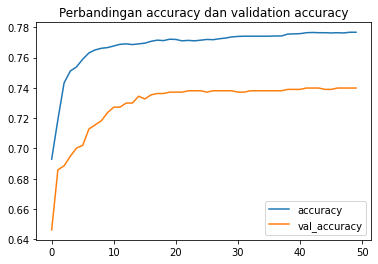

In [55]:
# plot accuracy dan val_accuracy
metrics_sequensial[['accuracy', 'val_accuracy']].plot()
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

- Sama halnya dengan loss yang akan berubah jika dilakukan re-run, accurasi juga mengalami hal yang sama
- Untuk run awalnya perbedaan antara validasi dan train tidak memiliki perbedaan signifkan, dimana untuk validasinya memiliki akurasi sekitar 0.72 dan train pada 0.76 dan pada epoch 27 mengalami sedikit kenaikan
- Berbanding terbalik dengan nilai loss, nilai akurasi akan baik jika nilainya semakin naik

Model Evaluation

In [56]:
# prediksi data train
y_pred_sequential = model_sequential.predict(X_train_final)
# atur threshold 0.5
y_pred_sequential = np.where(y_pred_sequential >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_train_balanced, y_pred_sequential))

204/204 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      3260
           1       0.76      0.85      0.80      3260

    accuracy                           0.79      6520
   macro avg       0.79      0.79      0.79      6520
weighted avg       0.79      0.79      0.79      6520



In [57]:
# prediksi data test
y_pred_sq_test = model_sequential.predict(X_test_final)
# atur threshodl 0.5
y_pred_sq_test = np.where(y_pred_sq_test >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_sq_test))

44/44 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1022
           1       0.52      0.78      0.63       367

    accuracy                           0.76      1389
   macro avg       0.71      0.76      0.72      1389
weighted avg       0.80      0.76      0.77      1389



- Dari classification report hasil akurasi antara data train 79% dan test 76% dengan perbedaan yang tidak signifikat. Perbedaan hanya mencapai 3% sehingga dapat dikatakan model yang dibuat telah goodfit dengan arsiterktur menggunakan activation function default pada tiap hidden layer.
- Nilai recall untuk label 1 dan 0 tidak memiliki perbedaan yang jauh karena telah dilakukan handling imbalace data sebelumnya.
- Seperti halnya grafik loss yang bisa berubah jika dilakukan re-run, maka kemungkinan akan terjadinya perubahan nilai dari classification report tetap ada karena hasil ini berasal dari train model sebelumnya.

### **Model Functional API**

Membuat model dengan arsitektur yang sama tetapi dengan menggunakan aturan functional API

In [58]:
# definisikan input layer
input_func = tf.keras.layers.Input(19,)
# hidden layer 1
hidden_1 = tf.keras.layers.Dense(16)(input_func)
# hidden layer 2
hidden_2 = tf.keras.layers.Dense(8)(hidden_1)
# output layer
output_func = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_2)
# definisikan model
model_func = tf.keras.Model(inputs=input_func, outputs=output_func)

Lakukan compile untuk model functional API

In [59]:
# compile
model_func.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Training model

In [60]:
# training model dengan 50 epoch
history_func = model_func.fit(train_dataset, 
                                epochs=50, 
                                validation_data=(val_dataset),
                                verbose=1)

Epoch 1/50
51/51 [==============================] - 10s 44ms/step - loss: 0.6876 - accuracy: 0.5834 - val_loss: 0.5725 - val_accuracy: 0.7102
Epoch 2/50
51/51 [==============================] - 1s 11ms/step - loss: 0.5632 - accuracy: 0.7206 - val_loss: 0.5579 - val_accuracy: 0.7084
Epoch 3/50
51/51 [==============================] - 1s 14ms/step - loss: 0.5317 - accuracy: 0.7437 - val_loss: 0.5424 - val_accuracy: 0.7291
Epoch 4/50
51/51 [==============================] - 1s 11ms/step - loss: 0.5140 - accuracy: 0.7541 - val_loss: 0.5350 - val_accuracy: 0.7318
Epoch 5/50
51/51 [==============================] - 1s 10ms/step - loss: 0.5040 - accuracy: 0.7606 - val_loss: 0.5302 - val_accuracy: 0.7264
Epoch 6/50
51/51 [==============================] - 1s 12ms/step - loss: 0.4973 - accuracy: 0.7643 - val_loss: 0.5271 - val_accuracy: 0.7264
Epoch 7/50
51/51 [==============================] - 0s 10ms/step - loss: 0.4927 - accuracy: 0.7678 - val_loss: 0.5250 - val_accuracy: 0.7300
Epoch 8/50
5

Lakukan visualisasi dari val loss dan loss

In [61]:
# ubah ke dataframe
metrics_fuct = pd.DataFrame(history_func.history)

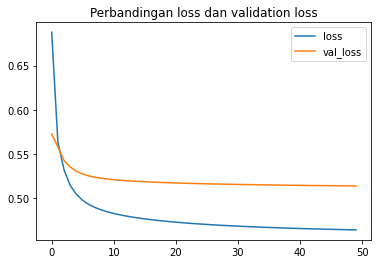

In [62]:
# plot loss dan validation loss
metrics_fuct[['loss', 'val_loss']].plot()
plt.title('Perbandingan loss dan validation loss')
plt.show()

Visualisasi dari accuracy dan val accuracy

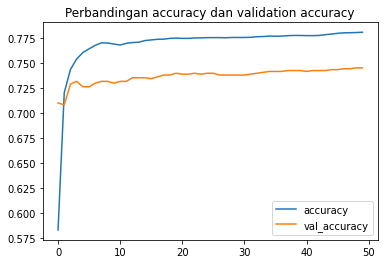

In [63]:
# plot accuracy dan validation accuracy
metrics_fuct[['accuracy', 'val_accuracy']].plot()
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Model Evaluation

In [64]:
# prediksi data train
y_pred_func = model_func.predict(X_train_final)
# atur threshold 0.5
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_train_balanced, y_pred_func))

204/204 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.73      0.78      3260
           1       0.76      0.84      0.80      3260

    accuracy                           0.79      6520
   macro avg       0.79      0.79      0.79      6520
weighted avg       0.79      0.79      0.79      6520



In [65]:
# prediksi data test
y_pred_func_test = model_func.predict(X_test_final)
# atur threshodl 0.5
y_pred_func_test = np.where(y_pred_sq_test >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_func_test))

44/44 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1022
           1       0.52      0.78      0.63       367

    accuracy                           0.76      1389
   macro avg       0.71      0.76      0.72      1389
weighted avg       0.80      0.76      0.77      1389



Dari model functional API
- arsitektur yang digunakan dalam model ini sama dengan pada model sequential
- Dari hasil classification report train dan test memiliki nilai sama antara model functional dan sequential. Hal ini karena node, jumlah layer, activation function dan sebagainya digunakan sama sehingga hasilnya juga sama. Jadi untuk assigment ini perbedaan antara functional dan sequential hanya pada penulisan atau proses pembuatan modelnya
- referensi untuk pembuatan model menggunakan materi dari P2W1D2PM: https://colab.research.google.com/drive/1tKknhpCCWOaG3YvmWfhJQXnQ1K8aCIso?usp=sharing dan https://colab.research.google.com/drive/1lKpwI0-NW22KhgummSVdHIVfHt2N0MOK?usp=sharing#scrollTo=bWeJM4i35kAD

## Model improvment

### **Model Sequential**

Setelah membuat model dengan menggunakan parameter default, maka akan dilakukan model improvment untuk mengurasi loss dan meningkatkan akurasi dari model. Cara untuk hyperparamter tunning ini adalah dengan mencoba mengganti weight initialization, activation function, optimizer, menambahkan atau mengurangi hidden layer, epoch dan sebagainya.

Buat arsitektur dari model sequensial sebelumnya dan tambahkan hyperparameter tunning

In [66]:
# Buat arsitektur model
# definisikan model Sequential yang di improve
model_imp = tf.keras.models.Sequential()
# layer input
model_imp.add(tf.keras.layers.Dense(8, input_shape=(19,), kernel_initializer='he_uniform'))
model_imp.add(tf.keras.layers.Dropout(rate=0.1))
# hidden layer 1
model_imp.add(tf.keras.layers.Dense(4, kernel_initializer='he_uniform'))
model_imp.add(tf.keras.layers.Dropout(rate=0.2))
# output layer
model_imp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#compile model
model_imp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training model dengan 50 epoch
history_imp = model_imp.fit(train_dataset, 
                            epochs=30, 
                            validation_data=(val_dataset),
                            verbose=1)

Epoch 1/30
51/51 [==============================] - 7s 32ms/step - loss: 1.8263 - accuracy: 0.4232 - val_loss: 1.4283 - val_accuracy: 0.3915
Epoch 2/30
51/51 [==============================] - 1s 12ms/step - loss: 1.2108 - accuracy: 0.4635 - val_loss: 0.9662 - val_accuracy: 0.4365
Epoch 3/30
51/51 [==============================] - 1s 10ms/step - loss: 0.9187 - accuracy: 0.5199 - val_loss: 0.7785 - val_accuracy: 0.5131
Epoch 4/30
51/51 [==============================] - 1s 13ms/step - loss: 0.7997 - accuracy: 0.5716 - val_loss: 0.6781 - val_accuracy: 0.6211
Epoch 5/30
51/51 [==============================] - 1s 15ms/step - loss: 0.6987 - accuracy: 0.6328 - val_loss: 0.6290 - val_accuracy: 0.6490
Epoch 6/30
51/51 [==============================] - 1s 12ms/step - loss: 0.6528 - accuracy: 0.6581 - val_loss: 0.5957 - val_accuracy: 0.6742
Epoch 7/30
51/51 [==============================] - 1s 13ms/step - loss: 0.6293 - accuracy: 0.6784 - val_loss: 0.5730 - val_accuracy: 0.6967
Epoch 8/30
51

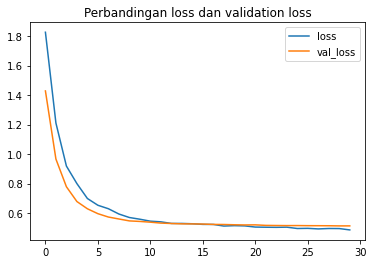

In [67]:
# ubah ke dataframe
metrics_imp = pd.DataFrame(history_imp.history)
# plot loss dan validation loss
metrics_imp[['loss', 'val_loss']].plot()
plt.title('Perbandingan loss dan validation loss')
plt.show()

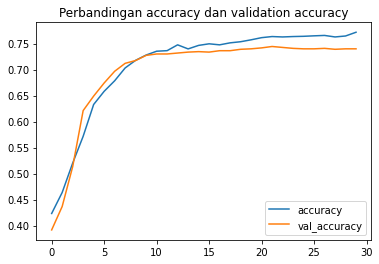

In [68]:
# plot accuracy dan validation accuracy
metrics_imp[['accuracy', 'val_accuracy']].plot()
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Model telah dilakukan improvment dengan
- Mengurangi jumlah hidden layer dari 2 menjadi 1 dan nodes pada tiap-tiap layer
- menambahkan kernel initializer (weight) pada input dan hidden layer menggunakan he_uniform. weight ini melakukaan scaling varians (ref: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeUniform)
- menambahkan rate drop out yang nilainya makin naik tiap layer
- Mengurangi nilai epoch dari 30 menjadi 50
- Sebenarnya hasil dari improvment model jika dilakukan re-run nilainya masih akan berubah, tetapi disini dilakukan untuk lebih menstabilkan model dalam perubahan tersebut dan meminimalisir terjadinya gradient desent (baik vanishing atau exploding)
- Improvment ini juga telah mengurangi sedikit overfit dari model.

Model Evaluation

In [69]:
# prediksi data train
y_pred_imp = model_imp.predict(X_train_final)
# atur threshold 0.5
y_pred_imp = np.where(y_pred_imp >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_train_balanced, y_pred_imp))

204/204 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3260
           1       0.76      0.84      0.80      3260

    accuracy                           0.79      6520
   macro avg       0.79      0.79      0.79      6520
weighted avg       0.79      0.79      0.79      6520



In [70]:
# prediksi data train
y_pred_imp_test = model_imp.predict(X_test_final)
# atur threshold 0.5
y_pred_imp_test = np.where(y_pred_imp_test >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_imp_test))

44/44 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1022
           1       0.54      0.77      0.63       367

    accuracy                           0.76      1389
   macro avg       0.72      0.77      0.73      1389
weighted avg       0.81      0.76      0.78      1389



Telah dilakukan prediksi pada train dan test
- Dari segi akurasi, dibandingkan dengan model default nilai akurasi dari model improvment ini memiliki nilai yang sama. tetapi pada model improv ini overfit (loss) juga telah dilakukan pengurangan.
- Karena datanya sudah dilakukan handling imbalance data, maka akurasi bisa dijadikan patokan untuk melihat seberapa baik model dalam memprediksi data yang benar.
- Selain akurasi, bisa meminimalisir precision, karena terdapat False Positive dimana customer yang hasil prediksinya churn tetapi aktualnya akan tidak churn. Jika seperti ini kemungkinan akan meningkatkan tingkat churn customer tersebut karena bisa jadi treatment yang diberikan perusahaan kurang baik setelah diprediksi bahwa customer akan churn. (ref: https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354)

### **Model Fuctional API**

Lakukan model improvment dari functional api sebelumnya.

In [71]:
# Buat model
# definisikan input layer
input_func = tf.keras.layers.Input(19,)
# hidden layer 1
hidden_1 = tf.keras.layers.Dense(16, kernel_initializer='he_uniform')(input_func)
drop_1 = tf.keras.layers.Dropout(rate=0.1) (hidden_1)
# hidden layer 2
hidden_2 = tf.keras.layers.Dense(8, kernel_initializer='he_uniform')(drop_1)
drop_2 = tf.keras.layers.Dropout(rate=0.1) (hidden_2)
# hidden layer 3
hidden_3 = tf.keras.layers.Dense(4, kernel_initializer='he_uniform') (drop_2)
drop_3 = tf.keras.layers.Dropout(rate=0.1) (hidden_3)
# output layer
output_func = tf.keras.layers.Dense(1, activation='sigmoid') (drop_3)
# definisikan model
model_imp_func = tf.keras.Model(inputs=input_func, outputs=output_func)

#compile model
model_imp_func.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training model dengan 50 epoch
history_imp_func = model_imp_func.fit(train_dataset, 
                            epochs=30, 
                            validation_data=(val_dataset),
                            verbose=1)

Epoch 1/30
51/51 [==============================] - 16s 94ms/step - loss: 0.8492 - accuracy: 0.6557 - val_loss: 0.7991 - val_accuracy: 0.6058
Epoch 2/30
51/51 [==============================] - 3s 68ms/step - loss: 0.8022 - accuracy: 0.6339 - val_loss: 0.6035 - val_accuracy: 0.6949
Epoch 3/30
51/51 [==============================] - 2s 40ms/step - loss: 0.6667 - accuracy: 0.6709 - val_loss: 0.5800 - val_accuracy: 0.6940
Epoch 4/30
51/51 [==============================] - 2s 42ms/step - loss: 0.6285 - accuracy: 0.6877 - val_loss: 0.5539 - val_accuracy: 0.7138
Epoch 5/30
51/51 [==============================] - 2s 30ms/step - loss: 0.5900 - accuracy: 0.7104 - val_loss: 0.5374 - val_accuracy: 0.7291
Epoch 6/30
51/51 [==============================] - 1s 18ms/step - loss: 0.5630 - accuracy: 0.7199 - val_loss: 0.5331 - val_accuracy: 0.7309
Epoch 7/30
51/51 [==============================] - 1s 19ms/step - loss: 0.5652 - accuracy: 0.7229 - val_loss: 0.5259 - val_accuracy: 0.7318
Epoch 8/30
5

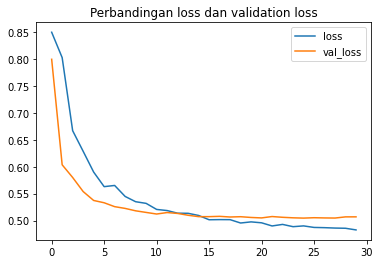

In [72]:
# ubah ke dataframe
metrics_imp_func = pd.DataFrame(history_imp_func.history)
# plot loss dan validation loss
metrics_imp_func[['loss', 'val_loss']].plot()
plt.title('Perbandingan loss dan validation loss')
plt.show()

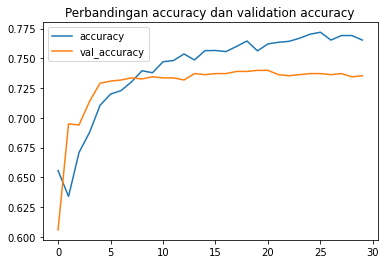

In [73]:
# plot accuracy dan validation accuracy
metrics_imp_func[['accuracy', 'val_accuracy']].plot()
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Telah dilakukan improvment pada model functional API:
- Pada model ini tidak dilakukan pengurangan hidden layer, tetapi ditanbahkan dropout dengan nilai rate yang sama
- Menambahkan kernel initializer yang sama dengan model sequensial yaitu he_uniform
- Saat dicoba ditambahakn learning rate, tetapi menyebabkan exploiding pada loss validation
- Menggunakan epoch = 30
- Hasil dari grafik akurasi masih mengalami sedikit overfit

Model Evaluation

In [74]:
# prediksi data train
y_pred_imp_fc = model_imp_func.predict(X_train_final)
# atur threshold 0.5
y_pred_imp_fc = np.where(y_pred_imp_fc >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_train_balanced, y_pred_imp_fc))

204/204 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3260
           1       0.76      0.84      0.80      3260

    accuracy                           0.79      6520
   macro avg       0.79      0.79      0.79      6520
weighted avg       0.79      0.79      0.79      6520



In [75]:
# prediksi data train
y_pred_imp_fc_test = model_imp_func.predict(X_test_final)
# atur threshold 0.5
y_pred_imp_fc_test = np.where(y_pred_imp_fc_test >= 0.5, 1, 0)
# hasil dari classification report
print(classification_report(y_test, y_pred_imp_fc_test))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1022
           1       0.54      0.78      0.64       367

    accuracy                           0.77      1389
   macro avg       0.72      0.77      0.73      1389
weighted avg       0.81      0.77      0.78      1389



Hasil dari improvment model functional API:
- Hasil akurasi dari train dan test dapat dikatakan goodfit karena perbedaan perbedaannya hanya 3%
- Hasil dari prediksi model sequensial dan fuctional API menunjukkan hal yang sama, hal ini disebabkan karena struktur, improve yang dilakukan dari kernel initializer dan jumlah epoch sama.
- Tetapi jika dilakukan re-run hasil grafik loss sequential masih lebih stabil dibandingkan dengan function API
- Jadi model terbaik yang akan digunakan adalah **model Sequential yang telah di improve**

# **7. Model Saving**

Dilakukan model saving yang digunakan untuk model inference dan model deployment. Model terbaik yang dipilih adalah model yang telah dilakukan improvment

In [76]:
# save model
model_imp.save("model_final")

INFO:tensorflow:Assets written to: model_final\assets


# **8. Model Inference**

Lakukan prediksi pada data inference (data yang dianggap baru), data ini diambil secara random dari dataset aslinya dimana ada 100 data yang akan diprediksi

In [77]:
# display data inf
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6211-WWLTF,Male,0,Yes,No,63,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),99.70,6330.40,0
1,3230-IUALN,Female,0,Yes,Yes,45,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,81.00,3533.60,0
2,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.70,374.80,0
3,4958-XCBDQ,Male,1,No,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,3496.30,1
4,4455-BFSPD,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),101.15,6383.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5081-NWSUP,Female,0,No,No,10,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,No,Mailed check,64.90,685.55,0
96,7321-VGNKU,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.35,120.25,0
97,9732-KPKBW,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,53.95,53.95,1
98,5380-XPJNZ,Female,0,No,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,678.20,0


In [78]:
# Memisahkan kolom numerik dan kategorik
data_inf_num = data_inf[num_col]
data_inf_cat = data_inf[cat_col]

#scaling dan encoding
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

# concate kolom numerik dan kategorik
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

lakukan prediksi dari model terbaik yang sudah disimpan, load model untuk digunakan

In [79]:
# load model
model_inf = load_model("model_final")

In [80]:
# prediksi data inferece
y_pred_inf = model_inf.predict(data_inf_final)
# atur threshold 0.5
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)

4/4 [==============================] - 1s 9ms/step


In [81]:
# membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Churn Prediction'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_inf_predic.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,6211-WWLTF,Male,0,Yes,No,63,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Two year,No,Credit card (automatic),99.70,6330.4,0,0
1,3230-IUALN,Female,0,Yes,Yes,45,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Mailed check,81.00,3533.6,0,0
2,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,No,Month-to-month,No,Electronic check,80.70,374.8,0,1
3,4958-XCBDQ,Male,1,No,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,3496.3,1,1
4,4455-BFSPD,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,No,Bank transfer (automatic),101.15,6383.9,0,0


Tampilkan hasil dari hasil aktual dan prediksi

In [82]:
data_inf_predic["Churn"].value_counts()

0    82
1    18
Name: Churn, dtype: int64

In [83]:
data_inf_predic["Churn Prediction"].value_counts()

0    57
1    43
Name: Churn Prediction, dtype: int64

Hasil dari data inference
- Model yang telah disimpan dan diload untuk digunakan pada model inference telah berhasil digunakan.
- Dari 100 data yang ada, 25 data yang salah prediksi. Jadi model telah behasil memprediksi 75% dari data inference.
- Hasil ini telah sesuai dengan model sequensial yang telah di improv karena akurasi dari model tersebut hanya 76%, jadi telah mendekati nilainya.
- Hal yang menyebabkan akurasi tidak sama antara hasil test dan inferece karena data pada inference hanya sedikit.

# **9. Kesimpulan**

Pada Milestone 1 ini diberikan dataset  Telco Customer Churn` yang akan dilakukan prediksi mengenai seorang customer churn atau tidak. Dataset terdiri dari 7043 baris dan 21 kolom dengan tipe data kategori dan numerik. Model yang dibuat menggunakan Artifical Neural Network (ANN) dengan model Sequential dan Functional

**EDA**
- Terdapat 4 fitur yang memiliki korelasi paling tinggi dengan target yaitu PaperlessBilling, MonthlyCharges, SeniorCitizen dan PaymentMethod.
- Korelasi tenure dan TotalCharges tinggi, karena semakin lama atau semakin tinggi customer menggunakan layanan maka tagihan yang akan dibayar akan semakin tinggi juga
- Jumlah customer perempuan dan laki-laki memiliki jumlah yang hampir sama. Sedangkan customer didominasi usia yang lebih muda dengan persentase 83.79%
- Customer yang tidak memiliki patner cenderung tidak memiliki tanggungan, tetapi ada juga yang memiliki tanggungan. kemungkinan tanggungan yang dimaksud bisa jadi anggota keluarga lainnya. Misalnya seorang kakak menanggung biaya untuk adiknya.
- Berdasarkan uji hipotesis, diketahui bahwa rata-rata total charges dari senior citizen dan bukan senior citizen memiliki perbedaan yang signifikan. Dari sini juga diketahu bahwa walaupun persentase customer yang senior citizen sedikit tetapi mereka memiliki rata-rata total charges yang lebih tinggi.
- Perbandingan label target diketahui imbalace, tetapi tidak termasuk extrem karena label 1 atau yes memiliki jumlah 26.53%. Jadi imbalace data masih termasuk medium. Tetapi dilakukan handling imbalace data target agar model yang dibuat lebih baik.

**Preprosessing**
Sebelum data dimasukkan kedalam model, terleboh dahulu dilakukan pengolahan data. Pisahkan data inference, train, validation dan test. Lakukan cleaning missing value dan outliers, feature selection yaitu mendrop kolom CustomerID karena dianggap tidak memiliki pengaruh customer churn atau tidak berdasarkan ID atau identitasnya. Mengelompokkan data numerik dan kategorik. lakukan handling imbalace data dengan meggunakan SMOTENC kemudian lakukan scaling dan encoding.

**Model**
- Telah dibuat 2 model menggunakan Artifical Neural Network yaitu model sequential dan function. Pertama model yang dibuat hanya menggunakan activation function pada output saja, setelahnya baru dilakukan model improvment dengan cara menambahkan kernel initializer, dropout dan mengurangi hidden layer serta jumlah epoch. 
- secara keseluruhan antara model sequential dan fuctional adalah cara penulisan arsitektur modelnya saja, untuk penggunaan layer, nodes dan sebagainya semuanya sama. Jadi dari hasil prediksi sequensial dan function nilai akurasinya adalah sama.
- hasil akurasi prediksi dari train 79% dan test 76%, sebelum dan dilakukan improv hasil dari akurasinya bernilai sama.
- Sebelum dilakukan improv jika dilakukan rerun pada training hasil dari loss akan mengalami perubahan yang signifikat (terkadang bagus, terkadang exploiding). Setelah dilakuakn improv jika dilakuakn rerun maka hasilnya akan mirip-mirip dan jarang terjadi expoiding pada hasilnya. dari sini bisa disimpulkan bahwa salah satu keuntungan improvment model adalah untuk menstabilkan model atau meminimalisir terjadinya gradient desent

**Model Inference**
- Dari 100 data yang ada, 25 data yang salah prediksi. Jadi model telah behasil memprediksi 75% dari data inference.
- Hasil ini telah sesuai dengan model sequensial yang telah di improv karena akurasi dari model tersebut hanya 76%, jadi telah mendekati nilainya.
- Hal yang menyebabkan akurasi tidak sama antara hasil test dan inferece karena data pada inference hanya sedikit.

Secara keseluruhan model yang dibuat sudah cukup baik dan stabil, tetapi masih perlu dilakukan eksplorasi untuk lebih dapat meningkatkan perfoma dari model baik dari segi akurasi, kecepatan dan lainnya.